© Explore Data Science Academy

---
### Honour Code

I {**IDONGESIT BOKEIME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


## EXPLORE Data Science Academy Classification Hackathon

### Overview

- South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

- The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

- With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

- In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.


**From South African Government**

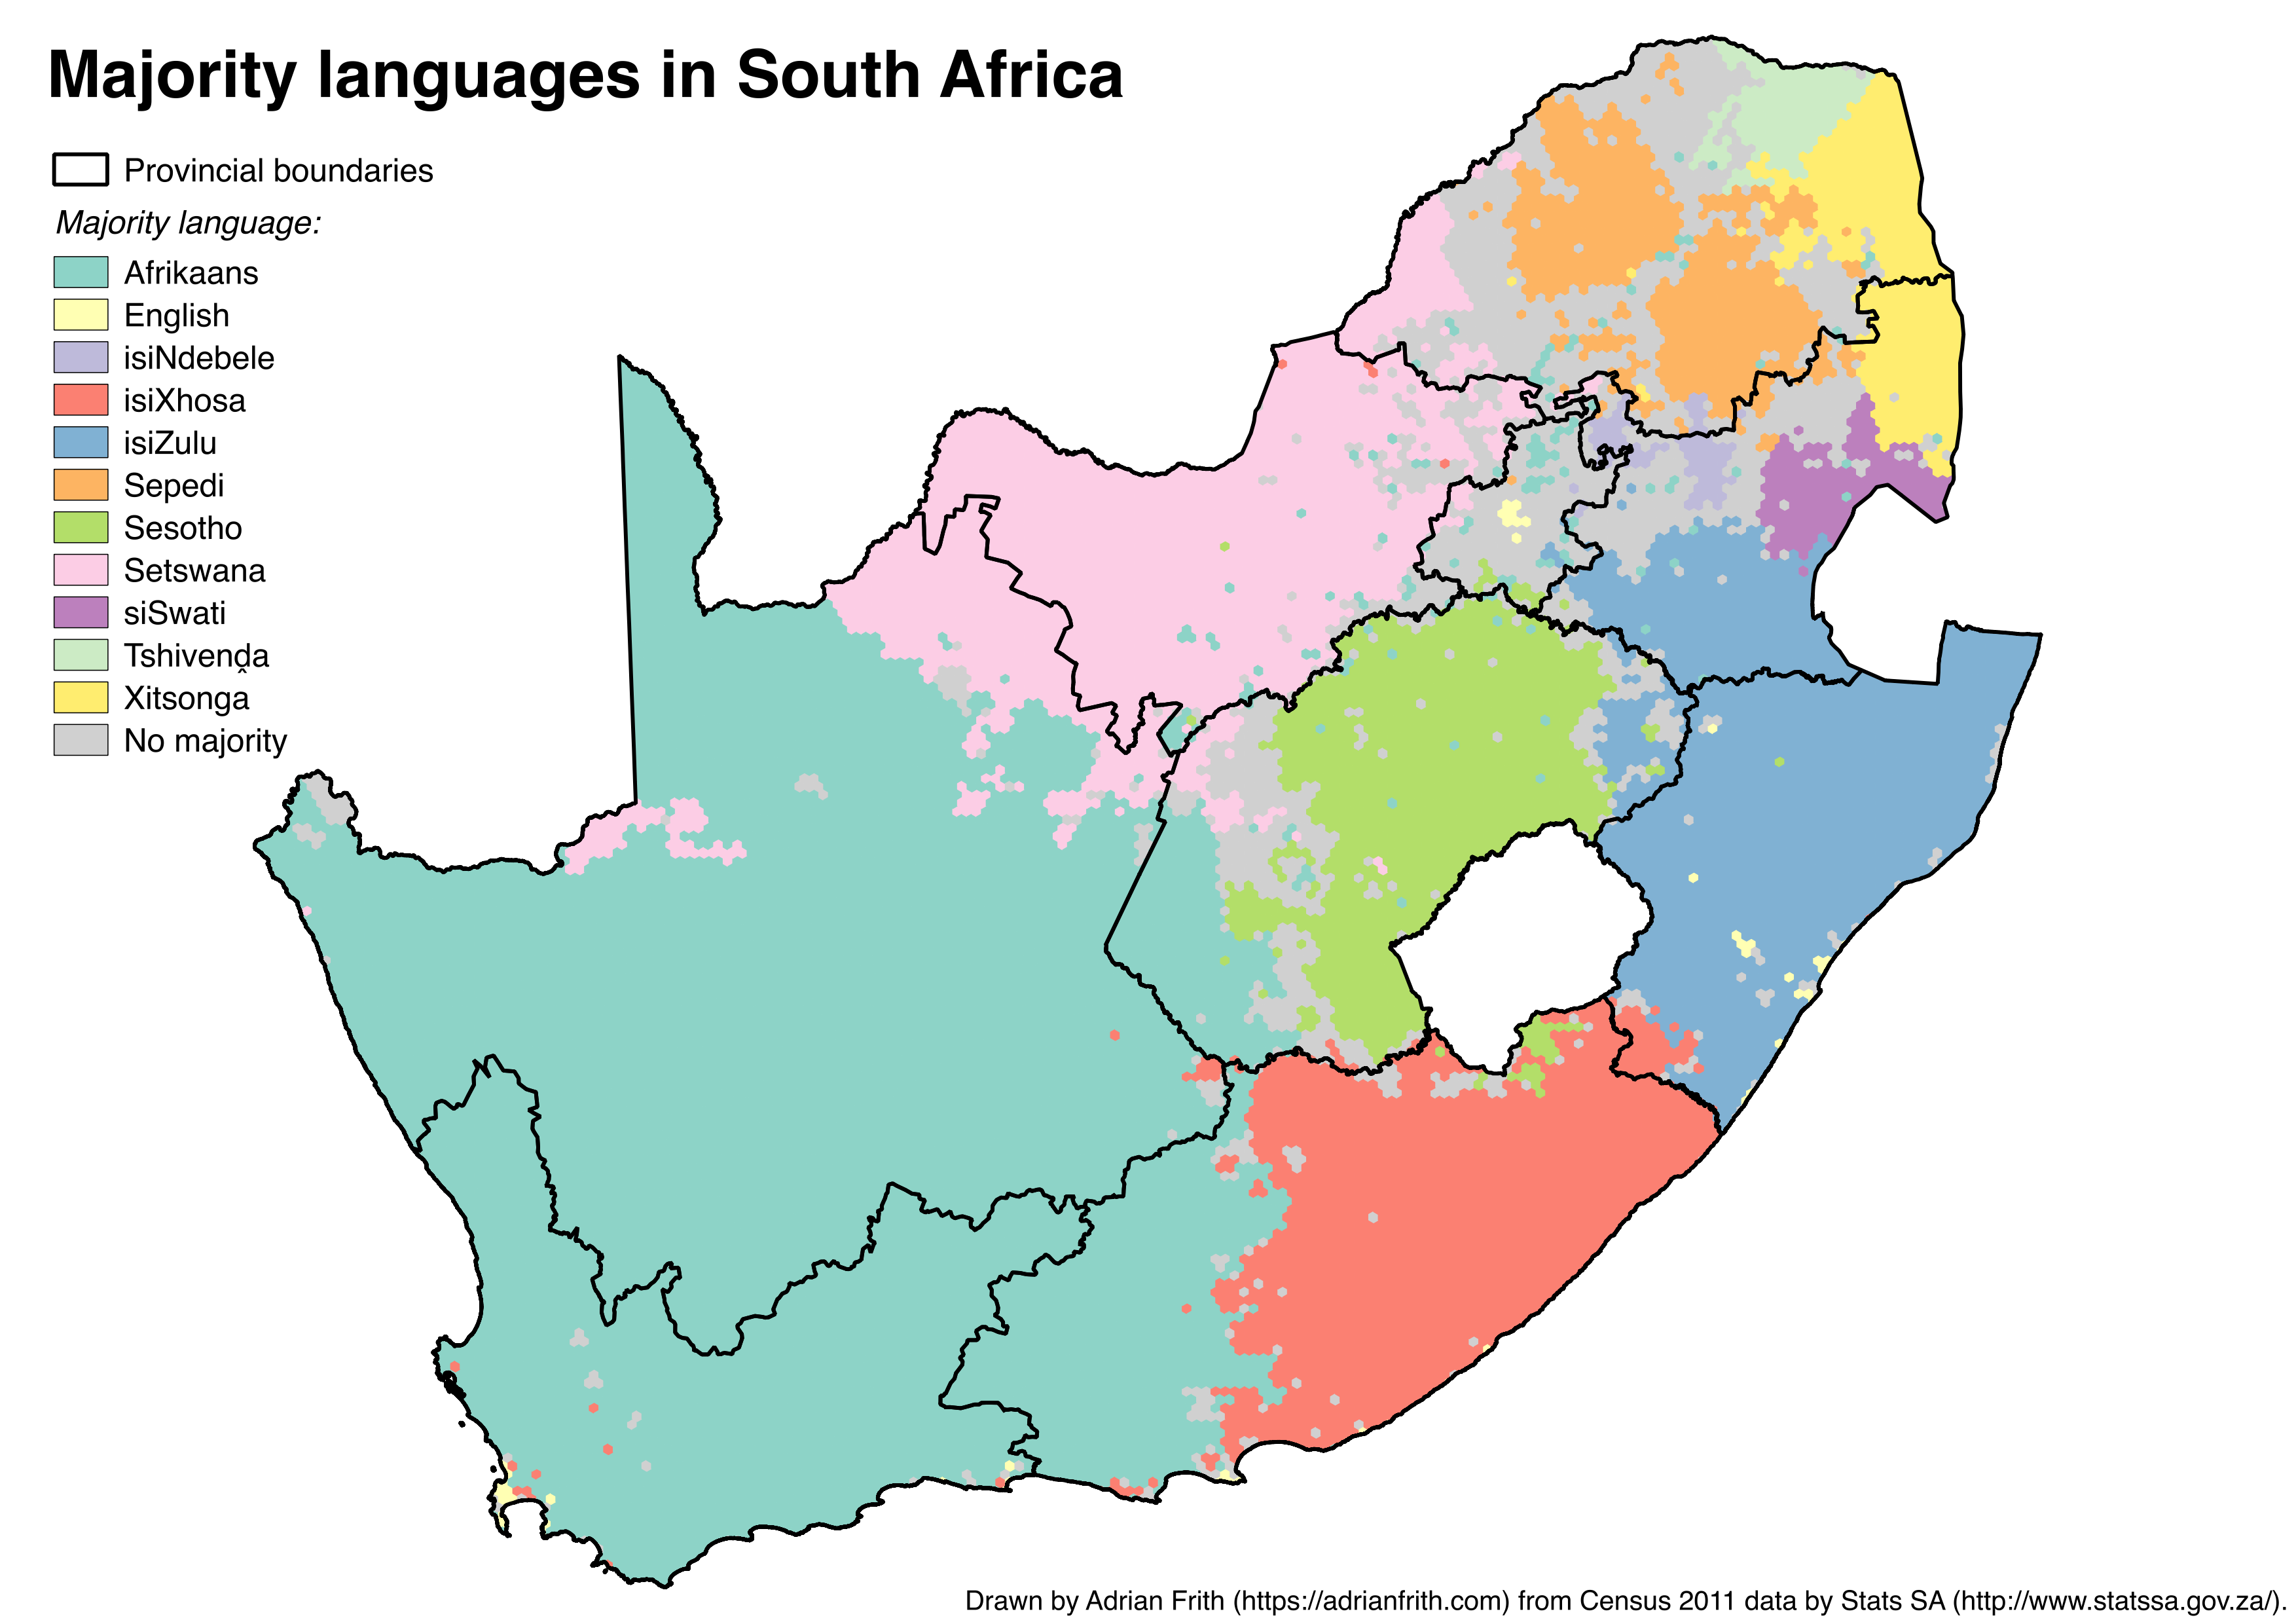

## Problem Statement

In a multilingual population like South Africa, the systems and devices are meant to support the mutilingual society and this comes with its own bottleneck.

My task is to take a text which is in any of South Africa's 11 Official languages and identify which language the text is in. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#seven>7. Conclusion</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

### Some of the Packages to be Imported and their uses

- Numpy: For arrays, algebra and Mathematical Calculations.
- Pandas: For Dataframe Manipulation and Statistical calculations such as mean.
- Matplotlib: For ploting normal charts and graphs.
- Seaborn: For scatterplots.
- Plotly: For producing interactive publication-quality graphs.
- Sklearn:  For predictive data analysis
- Statsmodels: For the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
- and many more.

In [1]:
#importing the required libraries
import numpy as np                     
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Customise our plotting settings
sns.set_style('whitegrid')

#Libraries for data cleaning and preprocessing
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.utils import resample
import string
import re
import pickle
import nltk
import string
stop = stopwords.words('english')

#Libraries for data preparation and model building
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score

# Classification report
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## 2. Loading the Data

#### Dataset Description

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

**File descriptions**
- train_set.csv - the training set
- test_set.csv - the test set

**Language IDs**

afr - Afrikaans
eng - English
nbl - isiNdebele
nso - Sepedi
sot - Sesotho
ssw - siSwati
tsn - Setswana
tso - Xitsonga
ven - Tshivenda
xho - isiXhosa
zul - isiZulu

In [2]:
# loading data
df = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [3]:
#Investigating the Train data - row and column numbers
df.shape

(33000, 2)

In [4]:
#Investigating the Test data - row and column numbers
df_test.shape

(5682, 2)

In [5]:
# Displaying the first 5 entries of our dataset
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
# Displaying the first 5 entries of our dataset
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


## 3. Exploratory Data Analysis

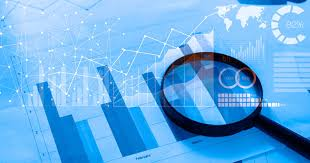

- Exploratory Data Analysis is the critical process of performing initial investigations on data so as to discover patterns, spot anomalies, test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

What is Exploratory Data Analysis? | by Prasad Patilhttps://towardsdatascience.com › exploratory-data-analysis

#### checking the features(columns) of data

In [51]:
# investigating the data type stored in each column and check for missing values - df_train.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lang_id     33000 non-null  object
 1   text        33000 non-null  object
 2   clean_text  33000 non-null  object
 3   message     33000 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [52]:
# investigating the data type stored in each column and check for missing values - df_test.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       5682 non-null   int64 
 1   text        5682 non-null   object
 2   clean_text  5682 non-null   object
 3   message     5682 non-null   object
dtypes: int64(1), object(3)
memory usage: 177.7+ KB


In [53]:
# showing the exact numbers of each language label.
df.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

Beautiful evenly distributed dataset.  No class imbalance seen here. 

#### Univariate Analysis: Non-Graphical

In [54]:
# look at data statistics
df["lang_id"].describe()

count     33000
unique    11   
top       xho  
freq      3000 
Name: lang_id, dtype: object

#### Visualization

<AxesSubplot:title={'center':'Bar Plot - Languages Distribution'}, xlabel='lang_id', ylabel='count'>

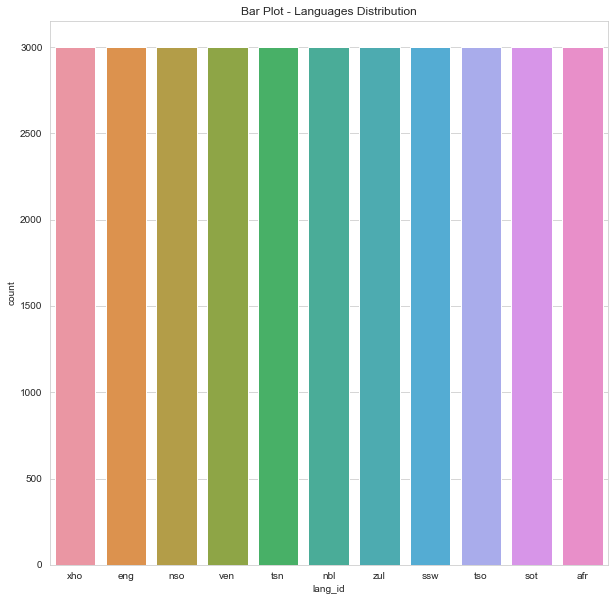

In [55]:
# Plotting the distribution of the languages
plt.figure(figsize=(10,10))
plt.title('Bar Plot - Languages Distribution')
sns.countplot(x='lang_id', data=df)

In [56]:
#expanding the dispay of text column
pd.set_option('display.max_colwidth', -1)
#using only text column
df[['text']]
df.tail()

C:\Users\HP\AppData\Local\Temp\ipykernel_48280\1715637728.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,lang_id,text,clean_text,message
32995,tsn,popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham,popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham,popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham
32996,sot,modise mosadi na ntse sa utlwe hore thabang rata ho iketsa sengangele jwang hona jwale ke mona se bolela ka moo batlang ho lokollelwa ngwana wa hae ka teng wena jwale batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore mathakake le banana ba motse oo kaofela,modise mosadi na ntse sa utlwe hore thabang rata ho iketsa sengangele jwang hona jwale ke mona se bolela ka moo batlang ho lokollelwa ngwana wa hae ka teng wena jwale batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore mathakake le banana ba motse oo kaofela,modise mosadi na ntse sa utlwe hore thabang rata ho iketsa sengangele jwang hona jwale ke mona se bolela ka moo batlang ho lokollelwa ngwana wa hae ka teng wena jwale batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore mathakake le banana ba motse oo kaofela
32997,eng,closing date submission completed tenders august h no late submissions considered submissions must enclosed sealed envelope addressed chief executive officer address,closing date submission completed tenders august h no late submissions considered submissions must enclosed sealed envelope addressed chief executive officer address,closing date submission completed tenders august h no late submissions considered submissions must enclosed sealed envelope addressed chief executive officer address
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa,nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa,nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa
32999,sot,mafapha mang le ona lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisi-kakaretso wa lefapha,mafapha mang le ona lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisi-kakaretso wa lefapha,mafapha mang le ona lokela ho etsa ditlaleho tsa ona ho latela dipehelo tsa nema merero yohle e lokela ho hlahlojwa ke komiti ya ditaba tsa tikoloho eo e kenyeleditseng motsamaisi-kakaretso wa lefapha


In [57]:
# Making a copy of our dataframes before cleaning
df_train = df
test = df_test

In [58]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df_train['clean_text']= df_train['text'].apply(lambda x:remove_punctuation(x))
test['clean_text']= test['text'].apply(lambda x:remove_punctuation(x))

In [59]:
## Remove urls
print ('Removing URLs...')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['clean_text']= df_train['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)
test['clean_text']= test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Make lower case
print ('Lowering case...')
df_train['clean_text']= df_train['text'].str.lower()
test['clean_text']= test['text'].str.lower()

Removing URLs...
Lowering case...


In [60]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_train['message'] = df_train['clean_text'].apply(lambda x: cleaning_repeating_char(x))
test['message'] = test['clean_text'].apply(lambda x: cleaning_repeating_char(x))
df_train['message'].tail()

32995    popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham          
32996    modise mosadi na ntse sa utlwe hore thabang rata ho iketsa sengangele jwang hona jwale ke mona se bolela ka moo batlang ho lokollelwa ngwana wa hae ka teng wena jwale batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore mathakake le banana ba motse oo kaofela
32997    closing date submission completed tenders august h no late submissions considered submissions must enclosed sealed envelope addressed chief executive officer address                                                                                                                     
32998    nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuval

In [61]:
textt = df_train['message']
text_te = test['message']

In [62]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
textt = textt.apply(lambda x: cleaning_numbers(x))
text_te = text_te.apply(lambda x: cleaning_numbers(x))

Defining set containing all stopwords in English.

In [63]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
            'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [64]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
textt = textt.apply(lambda textt: cleaning_stopwords(textt))
text_te = text_te.apply(lambda text_te: cleaning_stopwords(text_te))

#### Lemmatization
- Text Normalization techniques in the field of Natural Language Processing used to prepare text, words, and documents for further processing
- This is done to build common words for the words with similar root and context which makes it easier to model using classification algorithms.
- For our purpose, we will use lemmatization as it brings in common words that are meaningful and thus will be better for language analysis.

In [65]:
wordnet_tokenizer = WordNetLemmatizer()
textt = textt.apply(wordnet_tokenizer.lemmatize)
text_te = text_te.apply(wordnet_tokenizer.lemmatize)

In [66]:
# viewing the clean dataset
df_train['text'] = textt
test['text'] = text_te
df_train.head()

,lang_id,text,clean_text,message
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,province kwazulu-natal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months,province kwazulu-natal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months,province kwazulu-natal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months
3,nso,netefatša gore ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri magolo šomišwago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,netefatša gore ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri magolo šomišwago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,netefatša gore ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri magolo šomišwago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [67]:
test.head()

,index,text,clean_text,message
0,1,"mmasepala, fa maemo kgethegileng letlelela kgato eo.","mmasepala, fa maemo kgethegileng letlelela kgato eo.","mmasepala, fa maemo kgethegileng letlelela kgato eo."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.,uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.,uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.
2,3,tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,kube inja nelikati betingevakala kutsi titsini naticocisana.,kube inja nelikati betingevakala kutsi titsini naticocisana.,kube inja nelikati betingevakala kutsi titsini naticocisana.
4,5,winste op buitelandse valuta.,winste op buitelandse valuta.,winste op buitelandse valuta.


#### Building WordCloud of our processed train data

**Definition:**
A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.


Text(0.5, 1.0, 'AFR')

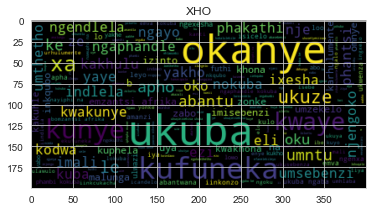

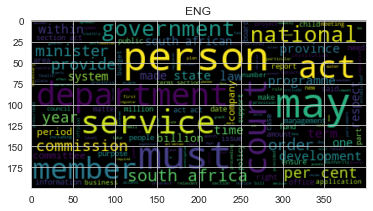

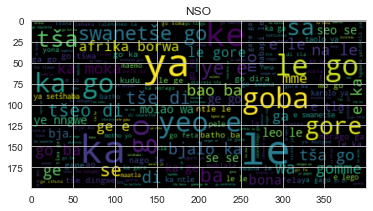

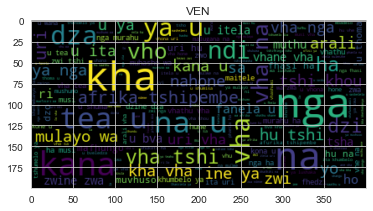

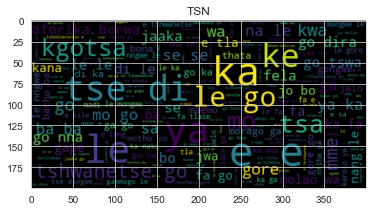

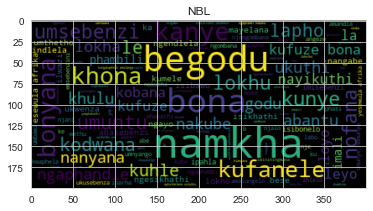

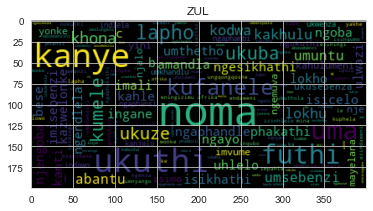

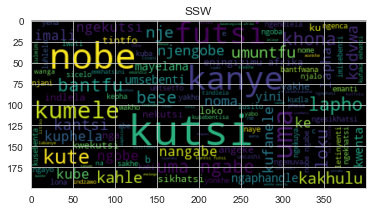

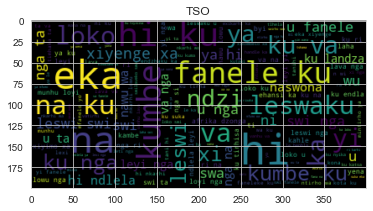

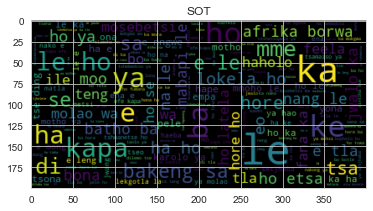

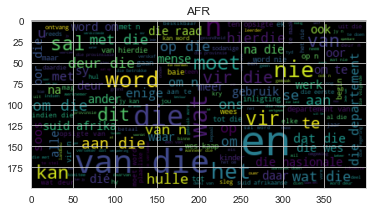

In [68]:
# wordcloud sowing each distinct language
xho = df_train[(df_train['lang_id'] == 'xho')]
eng = df_train[(df_train['lang_id'] == 'eng')]
nso = df_train[(df_train['lang_id'] == 'nso')]
ven = df_train[(df_train['lang_id'] == 'ven')]
tsn = df_train[(df_train['lang_id'] == 'tsn')]
nbl = df_train[(df_train['lang_id'] == 'nbl')]
zul = df_train[(df_train['lang_id'] == 'zul')]
ssw = df_train[(df_train['lang_id'] == 'ssw')]
tso = df_train[(df_train['lang_id'] == 'tso')]
sot = df_train[(df_train['lang_id'] == 'sot')]
afr = df_train[(df_train['lang_id'] == 'afr')]

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(xho.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('XHO')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(eng.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('ENG')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(nso.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('NSO')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(ven.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('VEN')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(tsn.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('TSN')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(nbl.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('NBL')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(zul.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('ZUL')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(ssw.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('SSW')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(tso.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('TSO')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(sot.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('SOT')

plt.figure()
wc = WordCloud(width=400, height=200, random_state=21, max_font_size=50).generate(" ".join(afr.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('AFR')

### Vectorization

Now, that we have cleaned our data and gained a brief view through the WordClouds, we will prepare the data for modelling. Preparation of text data involves converting into some numeric format which the machine learning models can understand. The computers only understand numerical data and therefore this is necessary.

Generally, there are various ways to convert text data into numeric form like CountVectorizer, TfIdf, etc. Count Vectorizer is based on the bag of words model. It works by counting the words’ frequencies in each document (each tweet in this case).

With TfIdf( Term Frequency–Inverse Document Frequency), the numeric values increase with the increase in the count of the words but are offset by the occurrence of the same word in the different corpus. For example, if there is a word ‘apple’ with many occurrences in a document with its presence in about 80% of the tweets, count vectorizer will give a high value for apple but TfIdf will have a negligible value because it is a common word occurring in many documents and therefore isn’t a useful word to classify the documents(or tweets here).

In this case, we will use TfIdf.

In [69]:
# Creating the new dataframes to be used for training and testing
df_trainnew = df_train[['lang_id', 'text']]
df_testnew = test['text']

- We will now use train_test_split to create new training and test set to get the best model. We can then use the best model on our original test set to get the F1 score.

In [70]:
# Assigning the X-features and Y-targets of the train datasets to X and y
# This is used to build trained and test data
X = df_trainnew['text']
y = df_trainnew['lang_id']

In [71]:
# Creating the train and test 
# The train-test split is a technique for evaluating the performance of a machine learning algorithm. 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=42)

In [72]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.2)

X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

X_testss = tfidf_vectorizer.transform(df_testnew)

In [73]:
#count_vectorizer = CountVectorizer(stop_words='english')

#X_train2 = count_vectorizer.fit_transform(X_train)
#X_test2 = count_vectorizer.transform(X_test)

#X_testss2 = count_vectorizer.transform(df_testnew)

#from sklearn import metrics
#text_clf.fit(list(X_train), list(y_train))
#predicted = text_clf.predict(list(X_test))
#print(metrics.classification_report(list(y_test), predicted))

## 5.  Modeling
five different models will be used for te analysis:

- Random Forest
- Support Vector Machine
- Logistic Regression
- Naive Bayes
- Stochastic Gradient Descent

The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models and then try to find out the one which gives the best performance among them.

#### Function For Model Evaluation

- After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

- Accuracy Score
- Confusion Matrix with Plot

### Model 1 - Random Forest

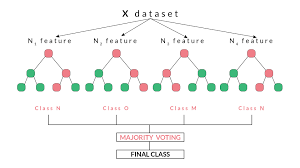

- A meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

- Reduction in over-fitting and its more accurate than decision trees in most cases.

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred2 = rf.predict(X_test)
print(classification_report(y_test, rf_pred2))

              precision    recall  f1-score   support

         afr       0.99      1.00      1.00       583
         eng       0.94      1.00      0.97       615
         nbl       0.96      0.94      0.95       583
         nso       1.00      0.99      0.99       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      0.96      0.97       584
         tsn       0.99      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.98      0.94      0.96       609
         zul       0.93      0.95      0.94       590

    accuracy                           0.98      6600
   macro avg       0.98      0.98      0.98      6600
weighted avg       0.98      0.98      0.98      6600



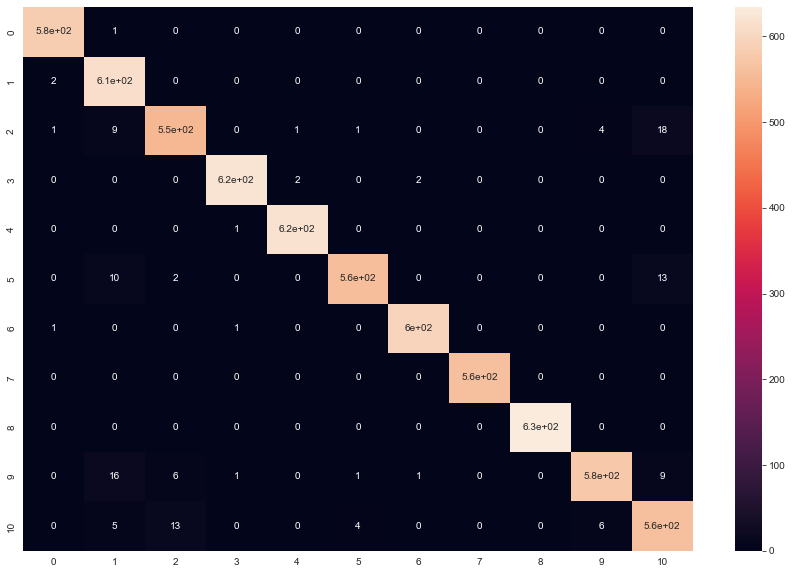

In [75]:
#plotting confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, rf_pred2)
cm = confusion_matrix(y_test, rf_pred2)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Kaggle Submission

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred2a = rf.predict(X_test)
print(f1_score(y_test, rf_pred2a, pos_label = 'positive', average='micro'))

0.980909090909091


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [43]:
rf_pred2a = rf.predict(X_testss)

submission_rf = df_test[['index']]
submission_rf['lang_id']= rf_pred2a
submission_rf.to_csv('submission_rf.csv', index = None)

C:\Users\HP\AppData\Local\Temp\ipykernel_50948\3012437307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_rf['lang_id']= rf_pred2a


### Model 2  -  Naive Bayes

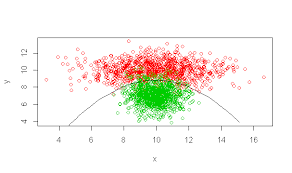

- Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

- Requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

In [45]:
# Model Training
from sklearn.naive_bayes import MultinomialNB  #classifier is suitable for classification with discrete features
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



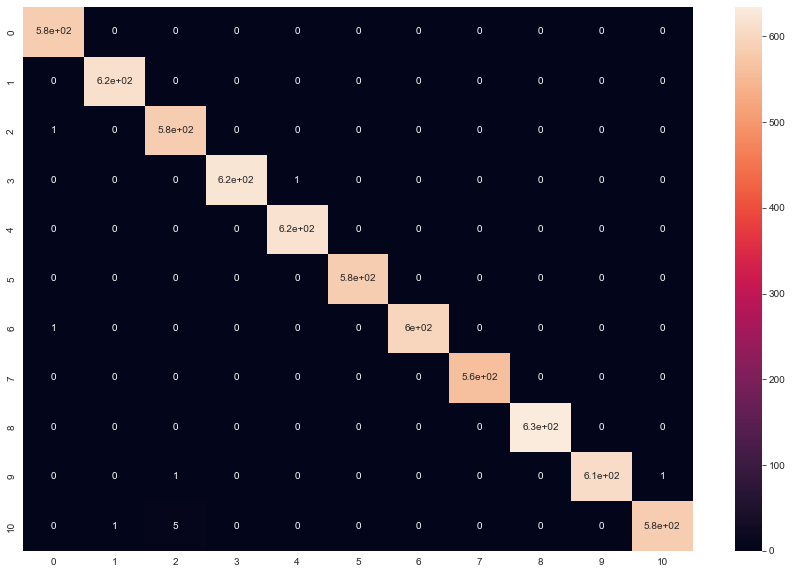

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, nb_pred)
cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Kaggle Submission

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred1 = nb.predict(X_test)
print(f1_score(y_test, nb_pred1, pos_label = 'positive', average='micro'))

0.9983333333333333


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [36]:
nb_pred1 = nb.predict(X_testss)

submission_nb = df_test[['index']]
submission_nb['lang_id']= nb_pred1
submission_nb.to_csv('submission_nb.csv', index = None)

C:\Users\HP\AppData\Local\Temp\ipykernel_50948\4160188881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_nb['lang_id']= nb_pred1


### Model 3 -  Support Vector Machine (SVM)

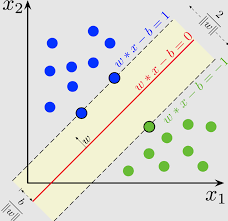

- Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

- Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

In [58]:
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_pred3 = svm.predict(X_test)
print(classification_report(y_test, svm_pred3))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



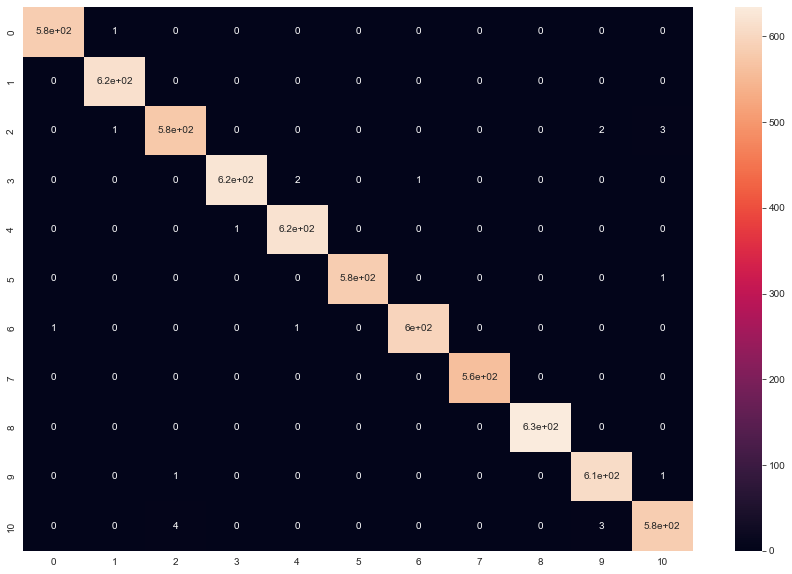

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, svm_pred3)
cm = confusion_matrix(y_test, svm_pred3)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Kaggle Submission

In [60]:
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_pred3a = svm.predict(X_test)
print(f1_score(y_test, svm_pred3a, pos_label = 'positive', average='micro'))

0.9965151515151515


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [61]:
svm_pred3a = svm.predict(X_testss)

submission_svm = df_test[['index']]
submission_svm['lang_id']= svm_pred3a
submission_svm.to_csv('submission_svm.csv', index = None)

C:\Users\HP\AppData\Local\Temp\ipykernel_50520\2157079820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_svm['lang_id']= svm_pred3a


### Model 4 - Logistic Regression

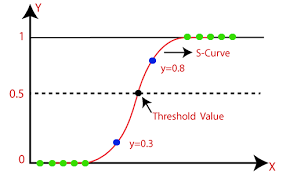

- In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

- Designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(classification_report(y_test, lr_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       0.99      1.00      0.99       615
         nbl       0.98      0.99      0.99       583
         nso       1.00      0.99      0.99       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      0.99      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



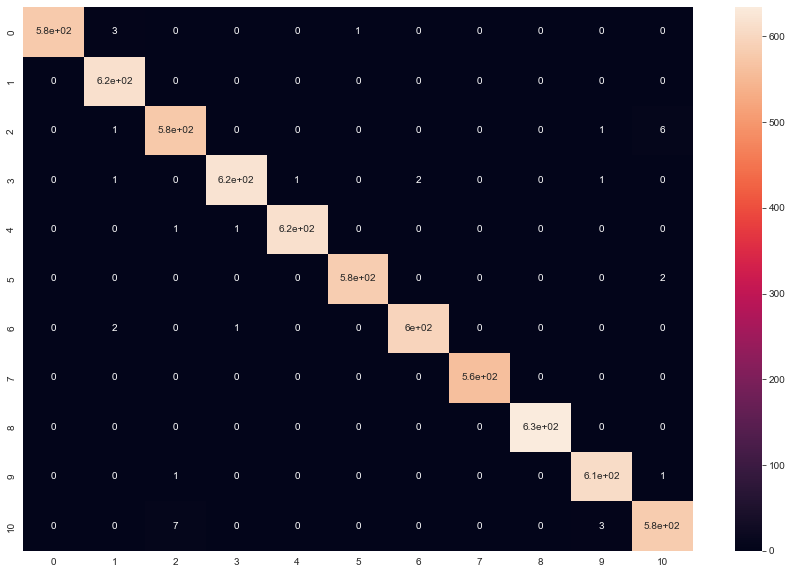

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, lr_pred)
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- The primary objective of model comparison and selection is definitely better performance of the machine learning software/solution. The objective is to narrow down on the best algorithms that suit both the data and the business requirements.

In [64]:
lr_score = metrics.accuracy_score(lr_pred, y_test)
svm_score = metrics.accuracy_score(svm_pred3, y_test)
rf_score = metrics.accuracy_score(rf_pred2, y_test)
nb_score = metrics.accuracy_score(nb_pred, y_test)

In [65]:
F1_scores = {
    'Models' : ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes'],
    'F1_Score' : [lr_score,svm_score,rf_score,nb_score]
}
  
# creating a Dataframe object 
f1_df = pd.DataFrame(F1_scores)
f1_df

,Models,F1_Score
0,Logistic Regression,0.994545
1,SVM,0.996515
2,Random Forest,0.978333
3,Naive Bayes,0.998333


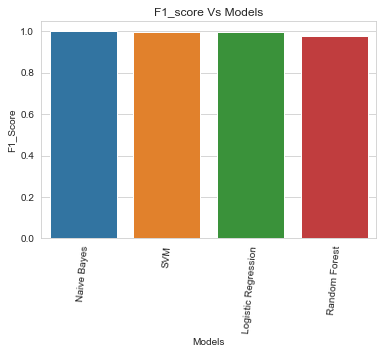

In [66]:
# bar plot model performance comparison
sns.barplot(x= f1_df['Models'], y = f1_df['F1_Score'],data=f1_df,order=f1_df.sort_values('F1_Score',ascending = False).Models) 

plt.title('F1_score Vs Models')
plt.xticks(rotation=85)
plt.show()

From the graph above, we can see that Naive Bayes perform the best with good metric score closely followed by Linear SVM, and Logistic regression. Random Forest performed the worst. 

They are  few questions concerning our modeling problems:

 - There are still a few more models we would have tested for better result e.g.KNN with high settings. Should we try more models for that perfect score?
 - Naive Bayes performed the best in score and execution time. Maybe using it with Count Vectorizer might increase the score further.  Execution time and memory comsumption is lao considered
 - The scores looks good but are they the best? should we improve on the current techniques using hyperparameter tunning?

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

There are a lot of questions, and this list isn't even complete! Explaining our best model - Naive Bayes:

- Naive Bayes is a classification algorithm that is suitable for binary and multiclass classification. It is a supervised classification technique used to classify future objects by assigning class labels to instances/records using conditional probability.
- Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable
